In [1]:
import numpy as np

In [2]:
# defining the sigmoid function for activation
def sigmoidFun(z):
    op = 1/(1 + np.exp(-z))
    return(op)

In [3]:
# defining the cost calculation function
def costFun(yActual, yPredicted):
    lossValues = [None]*np.shape(yActual)[1]
    logY0 = np.log(yPredicted)
    logY1 = np.log(1 - yPredicted)
    for i in range(np.shape(yActual)[1]):
        lossValues[i] = -(yActual.item((0,i))*logY0.item((0,i)) + (1-yActual.item((0,i)))*logY1.item((0,i)))
    costValue = np.sum(lossValues)/np.shape(yActual)[1]
    return(costValue)

In [4]:
# defining derivative of the sigmoid function
def sigmoidDer(z): # Derivative of the sigmoid function sigmoid(z)*(1-sigmoid(z)):
    op = np.array(sigmoidFun(z))*np.array((1-sigmoidFun(z)))
    return(op)

In [5]:
# Neural Network function that will be able to do above steps for epoch number of times and return final weights, biases and cost value for each function:
def neuralNet(X, y, numLayers, numNodes, alpha, epochs):
    
    costVal = [None]*epochs # Creating array to store cost value from each epoch
    
    # Initializing the weights and biases of the linear function of each node
    W = [None]*numLayers
    B = [None]*numLayers
    for i in range(numLayers):
        if i == 0:
            W[i] = np.asmatrix(np.random.rand(numNodes[i],np.shape(X)[0]))
            B[i] = np.asmatrix(np.random.rand(numNodes[i],1))
            continue
        W[i] = np.asmatrix(np.random.rand(numNodes[i],np.shape(W[i-1])[0]))
        B[i] = np.asmatrix(np.random.rand(numNodes[i],1))
    
    for k in range(epochs):
        
        # Calculating the Z (linear output W*X + B) values and the activation function (sigmoid(Z)) values for each node, this makes the forward propagation
        Z = [None]*numLayers
        Sig = [None]*numLayers
        for i in range(numLayers):
            if i == 0:
                Z[i] = np.dot(W[i],X) + B[i]
                Sig[i] = sigmoidFun(Z[i])
                continue
            Z[i] = np.dot(W[i], Sig[i - 1]) + B[i]
            Sig[i] = sigmoidFun(Z[i])


        # Calculating the loss across the output:
        costVal[k] = costFun(yActual = y, yPredicted = Sig[(numLayers - 1)])


        # Calculating the derivatives for the backward propagation:
        dZ = [None]*numLayers
        dW = [None]*numLayers
        dB = [None]*numLayers
        for i in range(numLayers, 0, -1):
            if i == 1:
                dZ[i-1] = Sig[i-1] - y
                dW[i-1] = (1/np.shape(X)[1])*(dZ[i-1])*np.transpose(X)
                dB[i-1] = (1/np.shape(X)[1])*np.sum(dZ[i-1], axis = 1)
                continue
            dZ[i-1] = Sig[i-1] - y
            dW[i-1] = (1/np.shape(X)[1])*(dZ[i-1])*np.transpose(Sig[i-2])
            dB[i-1] = (1/np.shape(X)[1])*np.sum(dZ[i-1], axis = 1)


        # Updating the weights and biases:
        for i in range(numLayers):
            W[i] = W[i] - alpha*dW[i]
            B[i] = B[i] - alpha*dB[i]


    return [W, B, costVal, numLayers]

In [6]:
# function to predict using a neural network model:
def predictNeuralNet(model, newData):
    # Calculating the Z (linear output W*X + B) values and activation function (sigmoid(Z)) values for each node
    numLayers = model[3]
    W = model[0]
    B = model[1]
    Z = [None]*numLayers
    Sig = [None]*numLayers
    for i in range(numLayers):
        if i == 0:
            Z[i] = np.dot(W[i],newData) + B[i]
            Sig[i] = sigmoidFun(Z[i])
            continue
        Z[i] = np.dot(W[i], Sig[i - 1]) + B[i]
        Sig[i] = sigmoidFun(Z[i])
    return(Sig[numLayers-1])

In [7]:
# testing the function on iris dataset:
from sklearn import datasets
data = datasets.load_iris() #loading a sample data for checking code errors
X = data.data[:, :4] # saving independent variables
y = data.target # saving the dependent variables
y[y == 2] = 1 # converting three class into two class
X = np.asmatrix(X) # converting into matrix
X = np.transpose(X) # tranposing the matrix to have all value of one record in one column and all records as different columns
y = np.asmatrix(y) #converting into matrix

In [18]:
nnModel = neuralNet(X = X, y = y, numLayers = 3, numNodes = [3, 2, 1], alpha = 0.01, epochs = 10000)

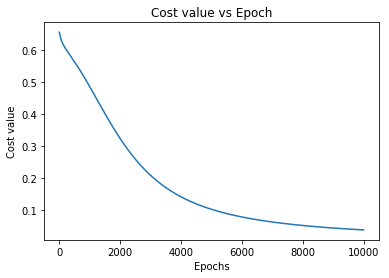

In [19]:
# Decrease in cost function of the model:
import matplotlib.pyplot as plt 
  
# x axis values 
xAxis = range(len(nnModel[2]))
# corresponding y axis values 
yAxis = nnModel[2]
  
# plotting the points  
plt.plot(xAxis, yAxis) 
  
# naming the x axis 
plt.xlabel('Epochs') 
# naming the y axis 
plt.ylabel('Cost value') 
  
# giving a title to my graph 
plt.title('Cost value vs Epoch') 
  
# function to show the plot 
plt.show()

In [20]:
# making predictions from the model
prdns = predictNeuralNet(model = nnModel, newData = X)

In [21]:
# accuracy (using the trainning data as no test data was created)
print("Accuracy: ", round((1 - np.sum(np.abs((np.round(prdns) - y)))/np.shape(prdns)[1])*100,2),"%")

Accuracy:  100.0 %


In [22]:
###As we can see, we have overfit the model